## Sport Injuries Data Exploration

### imports

In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

injuries_df = pd.read_csv('data/injuries.csv')
days_remaining = pd.read_csv('data/remaining_days.csv', index_col=False)
injuries_df['remaining_days'] = days_remaining

### Dataframe Exploration

In [20]:
print(injuries_df.shape)
print(injuries_df.dtypes)
injuries_df.head()

(6541, 30)
PlayerName                     object
PlayerId                       object
PlayerDOB                      object
Height                        float64
Weight                        float64
Positions                      object
GroupPosition                  object
DraftPick                     float64
IsActive                       object
FirstSeason                     int64
LastSeason                      int64
SeasonsPlayed                   int64
TeamNameFull                   object
TeamLocation                   object
TeamName                       object
Season                         object
SeasonStartYear                 int64
SeasonEndYear                 float64
TeamMadePlayoffs               object
DateInjured                    object
DateReturned                   object
GamesMissed                   float64
DaysInjured                     int64
DaysBetweenGames              float64
BodyPartInjured                object
InjuryDescription              object
L

,PlayerName,PlayerId,PlayerDOB,Height,Weight,Positions,GroupPosition,DraftPick,IsActive,FirstSeason,...,DateReturned,GamesMissed,DaysInjured,DaysBetweenGames,BodyPartInjured,InjuryDescription,LastTransactionDate,LastTransactionDescription,LastTransactionType,remaining_days
0,Steve Blake,blakest01,1980-02-26,75.0,172.0,Point Guard,G,38.0,False,2004,...,2013-01-29,37.0,57,79.0,abdominal,surgery to repair torn abdominal muscle (out i...,2010-07-08,Signed as a free agent with the Los Angeles La...,Signing,1215
1,Alan Anderson,anderal01,1982-10-16,78.0,220.0,"Small Forward, Shooting Guard",F,NaN,False,2006,...,2014-10-29,4.0,201,203.0,abdominal,sore abdominal muscle (DNP),2013-07-30,Signed as a free agent with the Brooklyn Nets.,Signing,1086
2,Arron Afflalo,afflaar01,1985-10-15,77.0,210.0,"Small Forward, Shooting Guard",G,27.0,False,2008,...,2016-03-13,2.0,4,5.0,abdominal,strained right abdominal muscle (DTD),2015-07-09,Signed a multi-year contract with the New York...,Signing,753
3,Bobby Simmons,simmobo01,1980-06-02,79.0,210.0,"Power Forward, Small Forward, Shooting Guard",F,41.0,False,2002,...,2009-02-17,5.0,14,17.0,abdominal,strained abdominal muscle (DNP),2008-06-26,Traded by the Milwaukee Bucks with Yi Jianlian...,Trade,1153
4,D.J. Augustine,augusdj01,1987-11-10,71.0,183.0,Point Guard,G,9.0,True,2009,...,2009-02-06,10.0,26,27.0,abdominal,strained abdominal muscle (out indefinitely),2008-06-26,Drafted by the Charlotte Bobcats in the 1st ro...,Draft,4098


In [ ]:
### Number of injuries association categorical

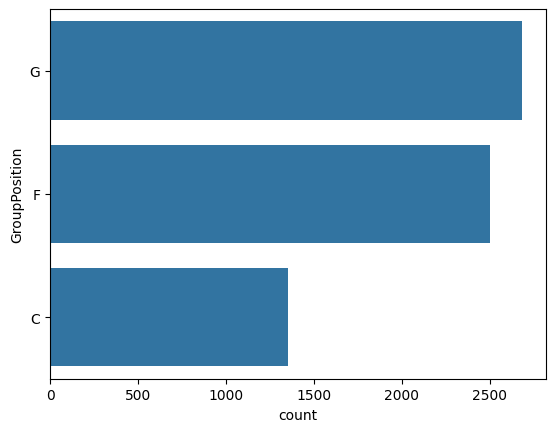

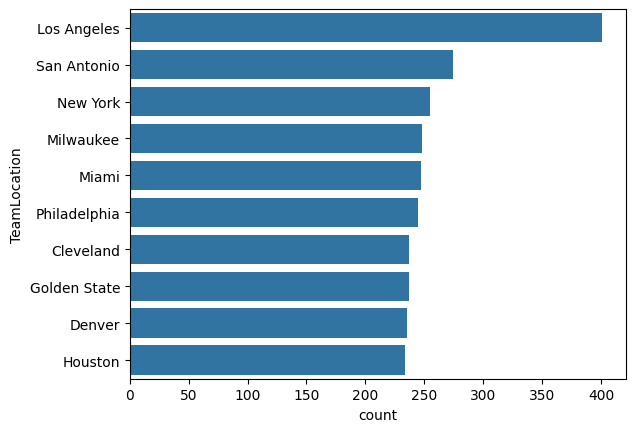

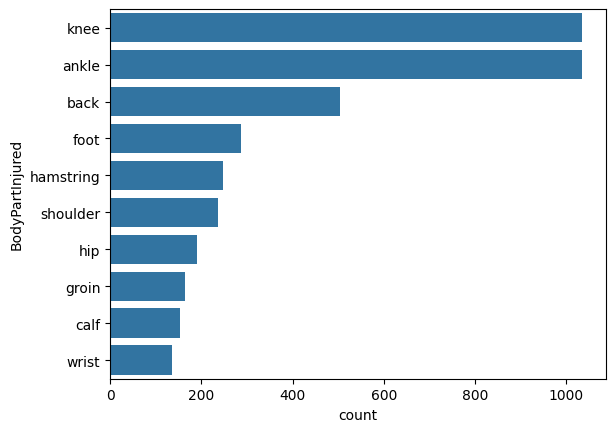

In [21]:
def injuries_dist_cat(col):
    count_df = injuries_df[col].value_counts().head(10)
    sns.barplot(x=count_df, y=count_df.index)
    plt.show()
# plots 10 cats with most injuries 
injuries_dist_cat('GroupPosition')
injuries_dist_cat('TeamLocation')
injuries_dist_cat('BodyPartInjured')


### Number of injuries association numeric

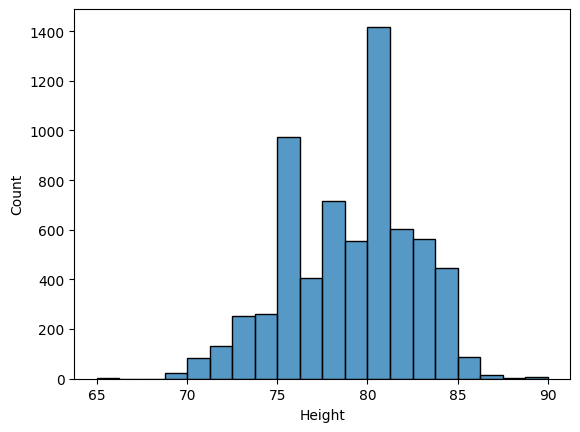

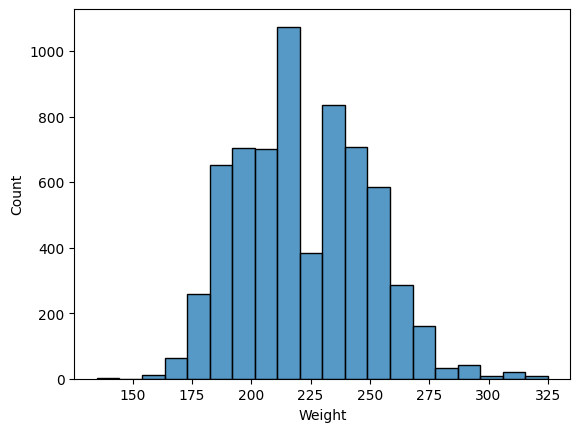

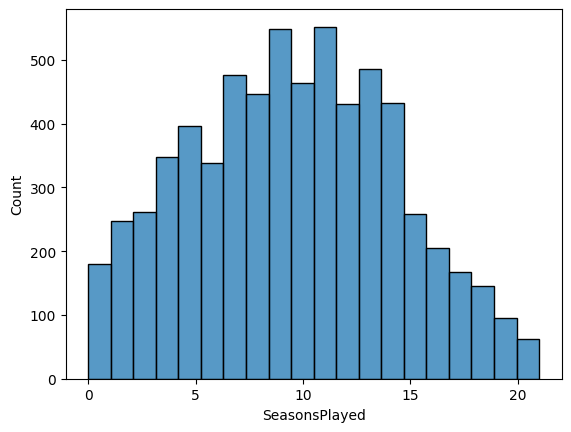

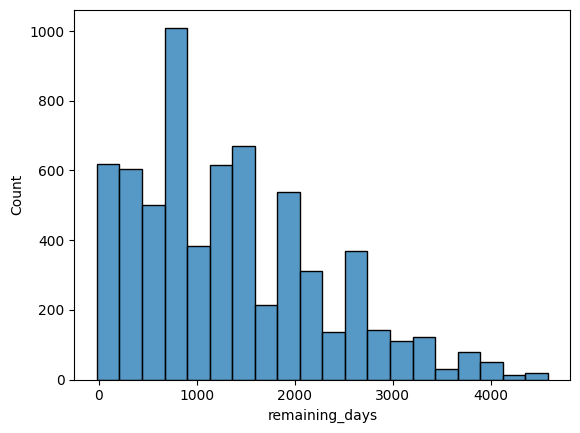

In [22]:
def injuries_dist_num(col):
    sns.histplot(data=injuries_df, x=col, bins=20)
    plt.show()

injuries_dist_num('Height')
injuries_dist_num('Weight')
injuries_dist_num('SeasonsPlayed')
injuries_dist_num('remaining_days')


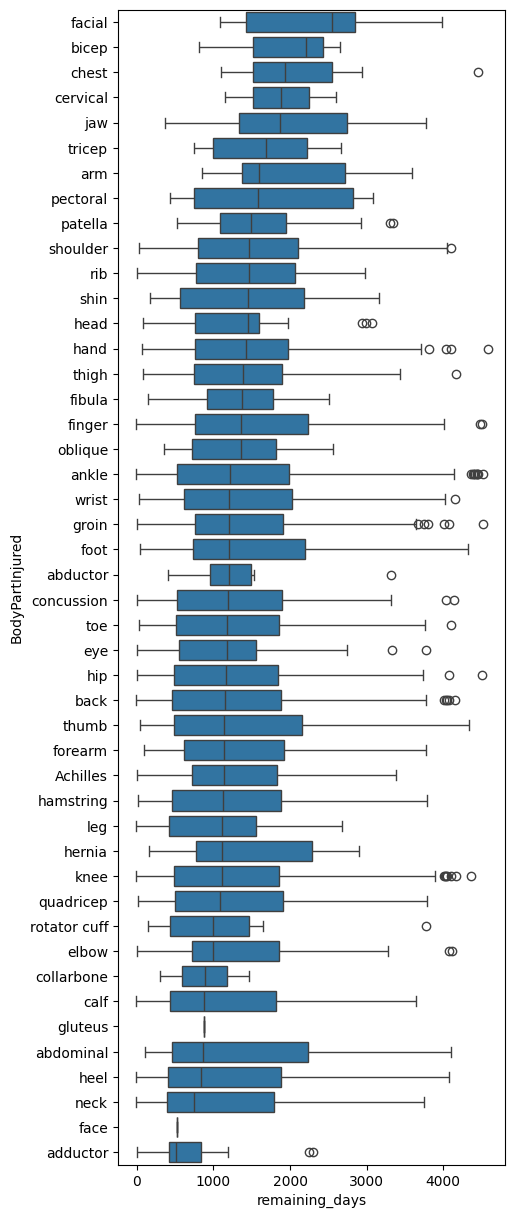

In [23]:
order = injuries_df.groupby('BodyPartInjured').remaining_days.median().sort_values(ascending=False).index
plt.figure(figsize=(5, 15))
sns.boxplot(data=injuries_df, y='BodyPartInjured', x='remaining_days', order=order)
plt.show()